# Analysis of model convergence for mobility with partial pooling of `transit` and `recreation` variables

The model explored here uses a different formula for mobility which separates all the values even those judged too colinear by the authors of the original study.

 + Pooling formula: `~ -1 + residential + transit + grocery + parks + retail + workplace`
 + Partial pooling formula: `~ -1 + transit + retail`

This criteria is defined in function `is_desired_pooling`

No partial pooling here, this means a single set of parameters are used for the 14 countries and French regions.

All functions are defined in [`mobility_model_analyse.ipynb`](mobility_model_analyse.ipynb) it is ran here
using the ipython magic.

In [1]:
%run mobility_model_analyse.ipynb

Must change directory as imports and data are from the root of the project

## Load Data

In [2]:
run_manifest = read_manifest('run-manifest.csv')
analysis_set = get_analysis_set(run_manifest)

## Group data in comparable runs

To group analysis runs we define `is_desired_pooling` which returns a true or false value

In [3]:
def is_desired_pooling(df, x):
    return (
        '~ -1 + residential + transit + grocery + parks + retail + workplace'
        == df.loc[x, "model"].data["arguments"]["formula_pooling"].strip()
    ) and (
        '~ -1 + transit + retail'
        == df.loc[x, "model"].data["arguments"]["formula_partialpooling"].strip()
    )

groups = analysis_set.groupby(lambda x : group_region_fit_and_pooling(analysis_set, x, is_desired_pooling))

Check what groups have been created

In [4]:
for i, group in enumerate(groups):
    print(f"Group {i + 1} of {len(groups)}: {group[0]}")

Group 1 of 21: ('v2', 'Europe', 'No region', False, '', '')
Group 2 of 21: ('v2', 'Europe', 'With regions', False, '', '')
Group 3 of 21: ('v2', 'France only', 'With regions', False, '', '')
Group 4 of 21: ('v3', 'Europe', 'With regions', False, '', '')
Group 5 of 21: ('v3', 'France only', 'With regions', False, '', '')
Group 6 of 21: ('v5', 'Europe', 'No region', False, '~ -1 + residential + transit + averageMobility', '~ -1 + residential + transit + averageMobility')
Group 7 of 21: ('v5', 'Europe', 'No region', False, '~ -1 + residential + transit + grocery + parks + retail + workplace', '~ -1')
Group 8 of 21: ('v5', 'Europe', 'No region', False, '~ -1 + residential + transit + grocery + parks + retail + workplace', '~ -1 + residential + transit + grocery + parks + retail + workplace')
Group 9 of 21: ('v5', 'Europe', 'No region', True, '~ -1 + residential + transit + grocery + parks + retail + workplace', '~ -1 + transit + retail')
Group 10 of 21: ('v5', 'Europe', 'With regions', Fal

## Analysis of convergence on France

The next few plots display data for France as a whole modelled from a range of different dates.


In [5]:
french_regions = ["France-hopitaux", "France-OC19"]

### France-hopitaux

Plotting group 13 of 21: ('v5', 'Europe', 'With regions', True, '~ -1 + residential + transit + grocery + parks + retail + workplace', '~ -1 + transit + retail')
Plotting group 21 of 21: ('v5', 'France only', 'With regions', True, '~ -1 + residential + transit + grocery + parks + retail + workplace', '~ -1 + transit + retail')


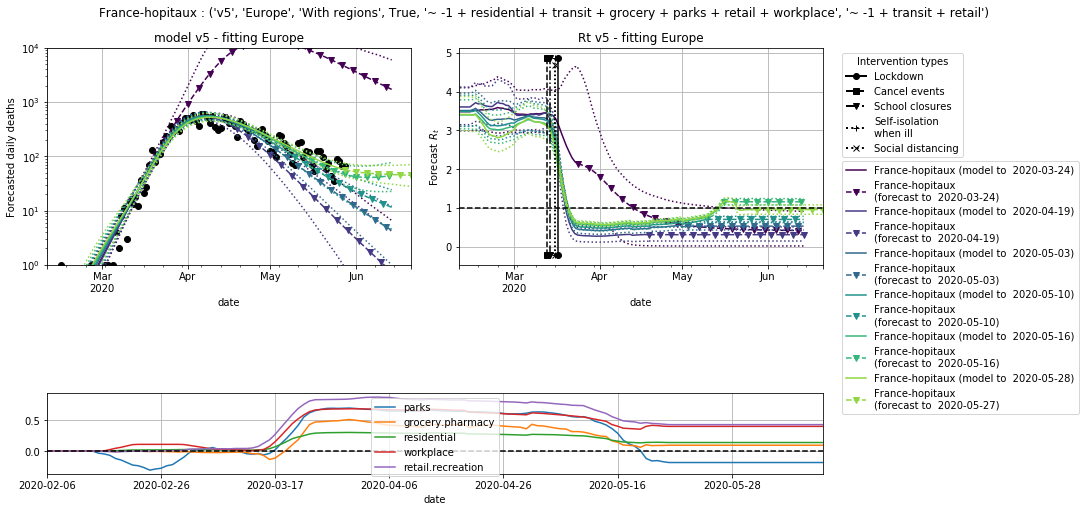

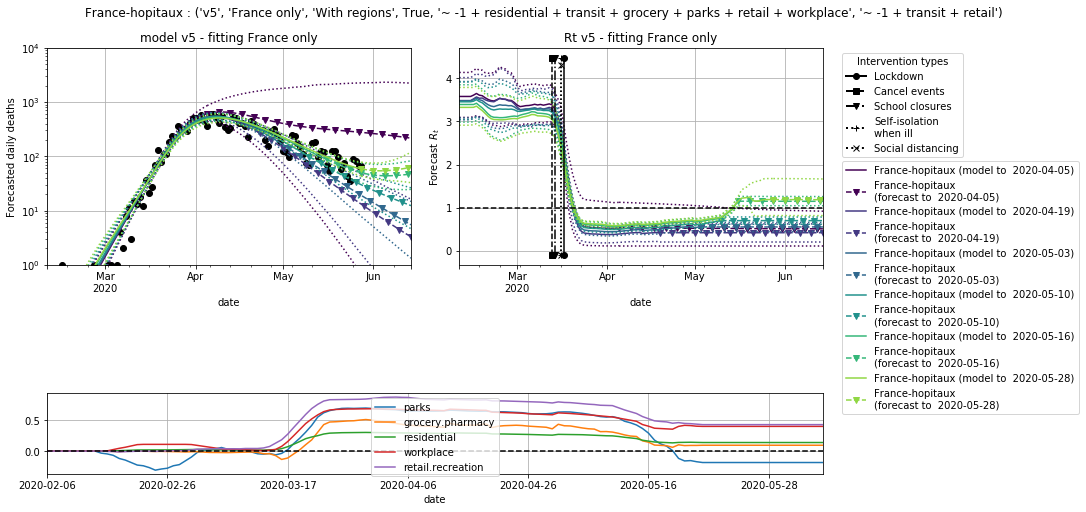

### France-OC19

Plotting group 13 of 21: ('v5', 'Europe', 'With regions', True, '~ -1 + residential + transit + grocery + parks + retail + workplace', '~ -1 + transit + retail')
Plotting group 21 of 21: ('v5', 'France only', 'With regions', True, '~ -1 + residential + transit + grocery + parks + retail + workplace', '~ -1 + transit + retail')


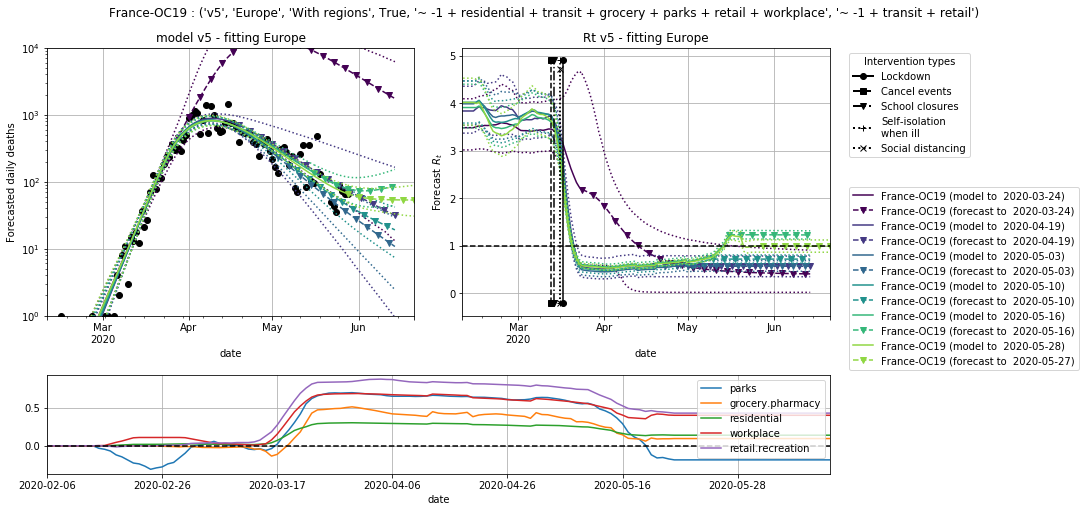

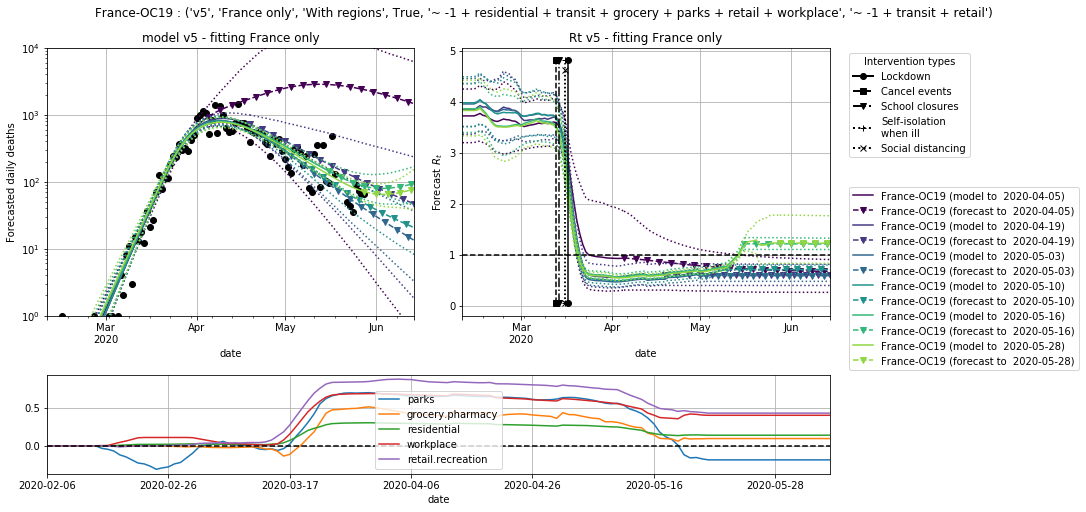

In [6]:
report_on_zones(french_regions, select_with_regions)

## Case study of European countries



In [7]:
countries = ['Spain', 'Italy', "United_Kingdom", 'Germany', 'Netherlands', 'Portugal', 'Denmark', 'Sweden']

### Spain

Plotting group 9 of 21: ('v5', 'Europe', 'No region', True, '~ -1 + residential + transit + grocery + parks + retail + workplace', '~ -1 + transit + retail')


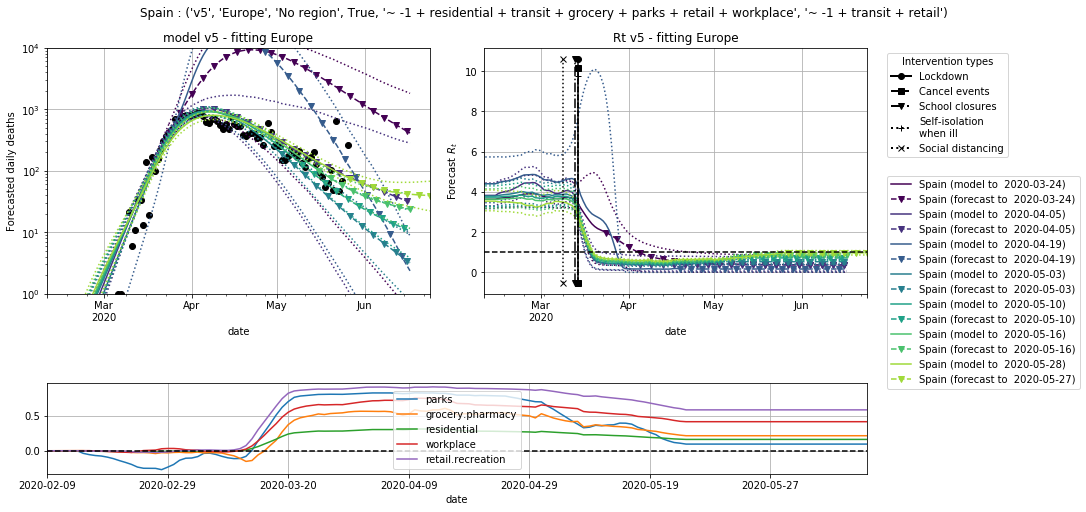

### Italy

Plotting group 9 of 21: ('v5', 'Europe', 'No region', True, '~ -1 + residential + transit + grocery + parks + retail + workplace', '~ -1 + transit + retail')


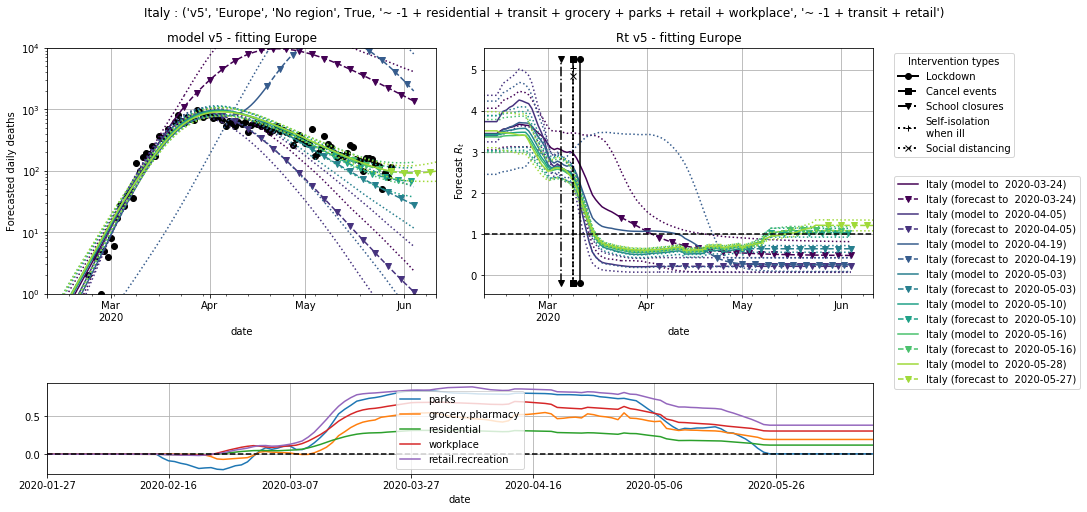

### United_Kingdom

Plotting group 9 of 21: ('v5', 'Europe', 'No region', True, '~ -1 + residential + transit + grocery + parks + retail + workplace', '~ -1 + transit + retail')


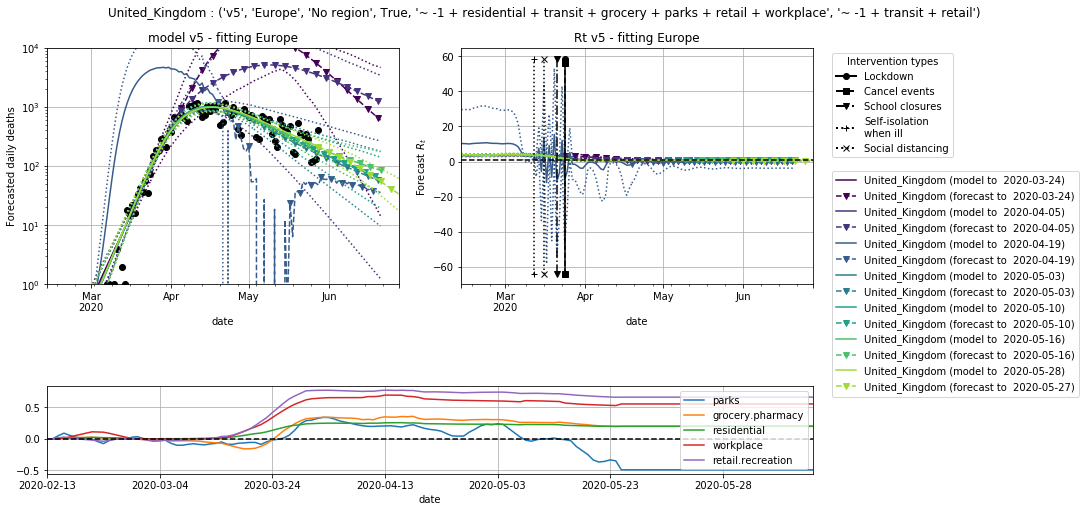

### Germany

Plotting group 9 of 21: ('v5', 'Europe', 'No region', True, '~ -1 + residential + transit + grocery + parks + retail + workplace', '~ -1 + transit + retail')


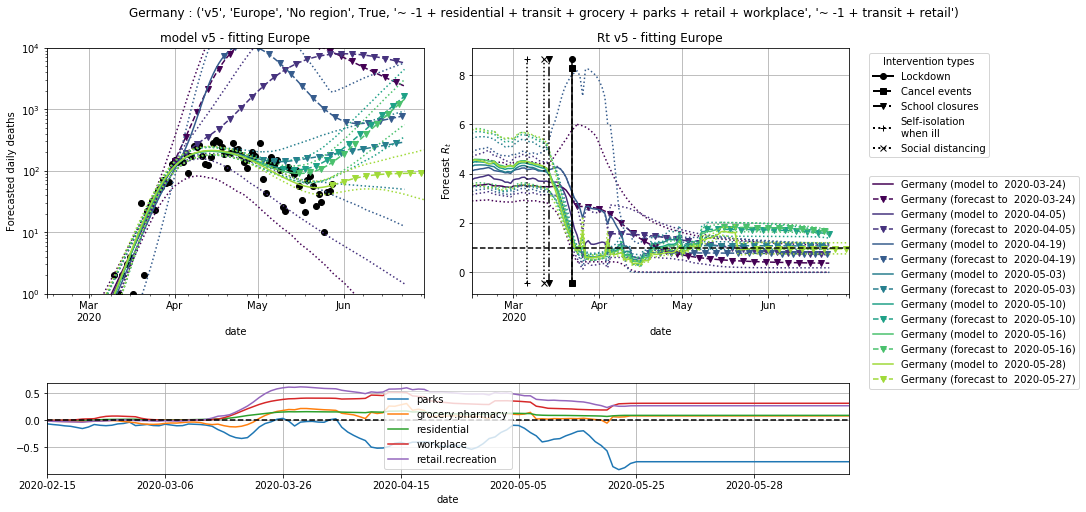

### Netherlands

Plotting group 9 of 21: ('v5', 'Europe', 'No region', True, '~ -1 + residential + transit + grocery + parks + retail + workplace', '~ -1 + transit + retail')


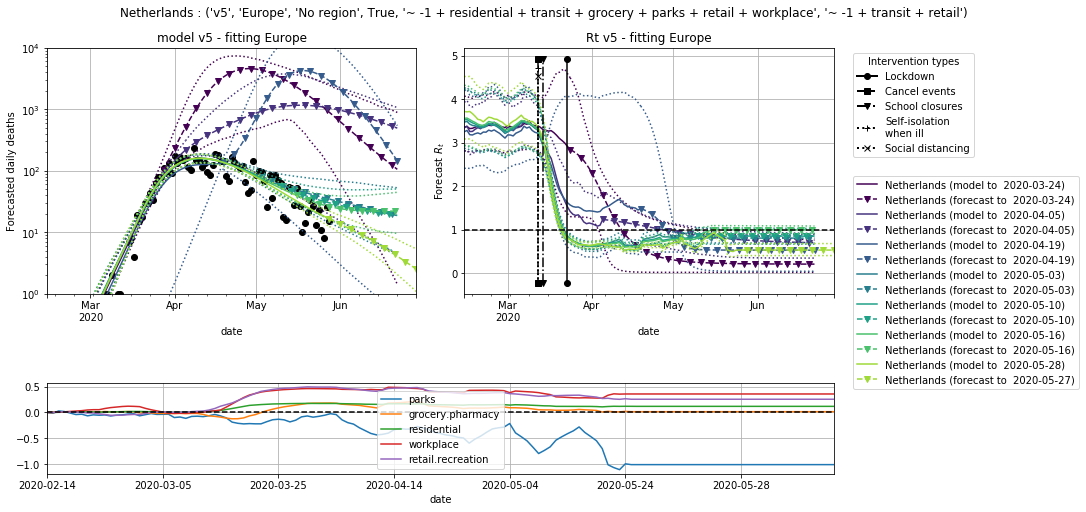

### Portugal

Plotting group 9 of 21: ('v5', 'Europe', 'No region', True, '~ -1 + residential + transit + grocery + parks + retail + workplace', '~ -1 + transit + retail')


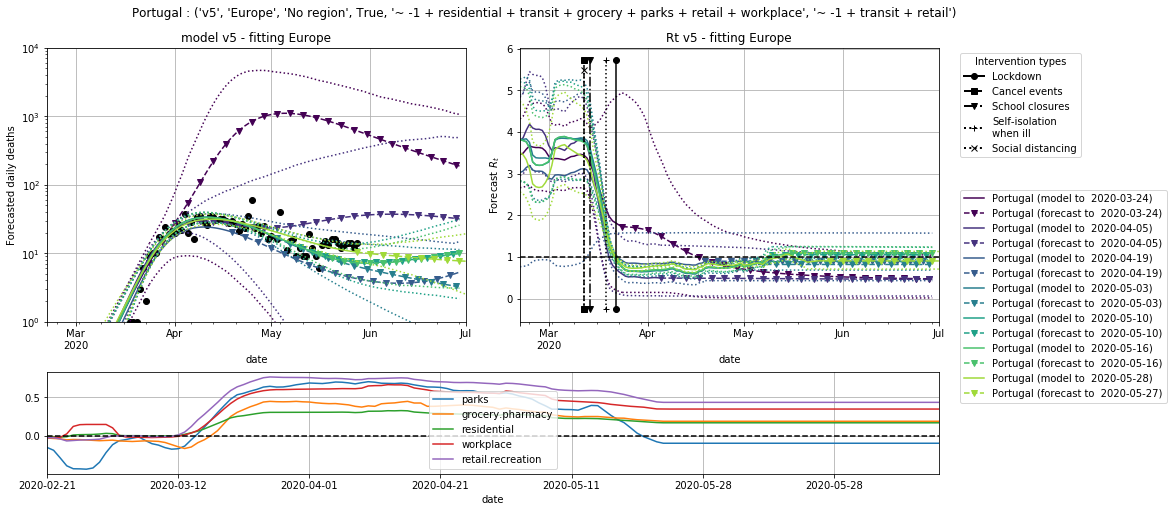

### Denmark

Plotting group 9 of 21: ('v5', 'Europe', 'No region', True, '~ -1 + residential + transit + grocery + parks + retail + workplace', '~ -1 + transit + retail')


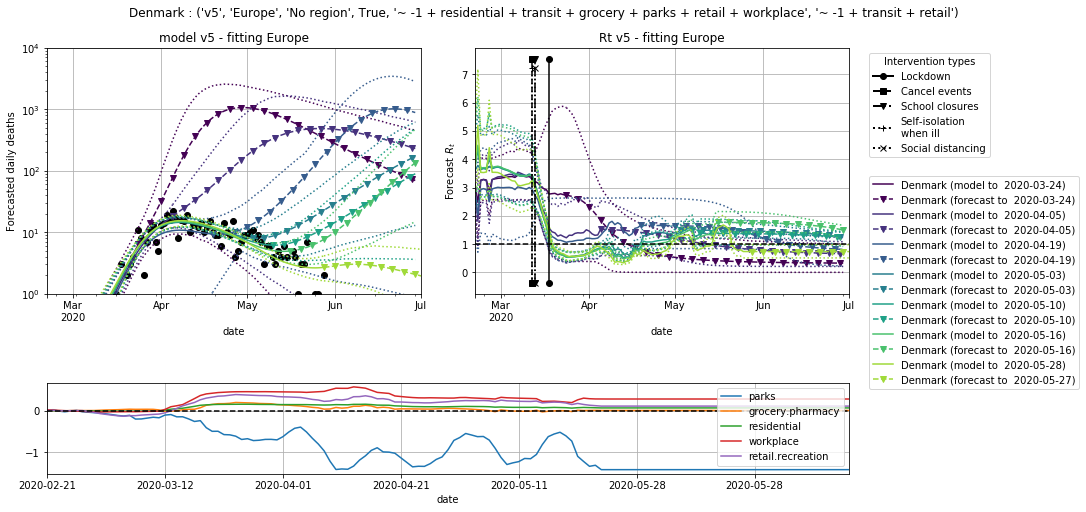

### Sweden

Plotting group 9 of 21: ('v5', 'Europe', 'No region', True, '~ -1 + residential + transit + grocery + parks + retail + workplace', '~ -1 + transit + retail')


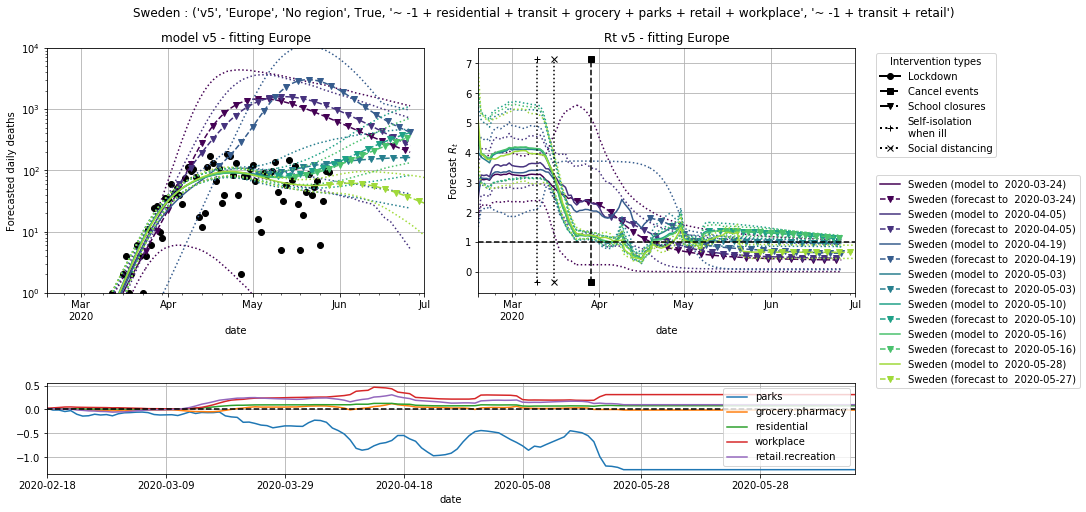

In [8]:
report_on_zones(countries, select_europe_only)

## Conclusions



### Note on convergence



### Future works



## Acknowledgements / Thanks

- The MRC at Imperial for open sourcing the model and their support
- [Nathan Desdouits](https://github.com/nathan-tc) for his advice on cleaning up the colours of the plots.